In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("MOFA2")

In [ ]:
#load libraries
library(ggplot2)
library(MOFA2)
library(dplyr)

In [19]:
#load models
CCLE_no_groups <- load_model("/content/CLLE_no_groups.hdf5")

In [20]:
#Load Metadata
metadata_no_filter <- read.csv('/content/Metada_DepMap Public 25Q2.csv')
pancreatic_cell_lines <- read.csv("/content/pancreas_CCLE_RNA_profile.csv")
#select pancreatic cell lines from metadata file
metada <- metadata_no_filter[metadata_no_filter$StrippedCellLineName %in% pancreatic_cell_lines$depmap_id,]

In [21]:
#Sort Metatada Base on Model Order
 metadata <- metadata_no_filter[metadata_no_filter$StrippedCellLineName %in% samples_names(CCLE_no_groups)[[1]],]

In [22]:
metada_for_graph <- data.frame(
  sample = metada$StrippedCellLineName,
  stage=metada$PrimaryOrMetastasis,
  age = metada$Age,
  sex = metada$Sex,
  race=metada$PatientRace,
  collection_site=metada$SampleCollectionSite,
  oncotreecode=metada$OncotreeCode,
  oncotreeSubtype =metada$OncotreeSubtype
)

In [23]:
#Add Metadata to the Model
samples_metadata(CCLE_no_groups) <- metada_for_graph

In [24]:
#Variance Explained by Each Factor
head(CCLE_no_groups@cache$variance_explained$r2_per_factor[[1]])

,RNA,Protein
Factor1,11.884875501,3.476855
Factor2,0.004461283,8.946189
Factor3,6.831478963,1.307663


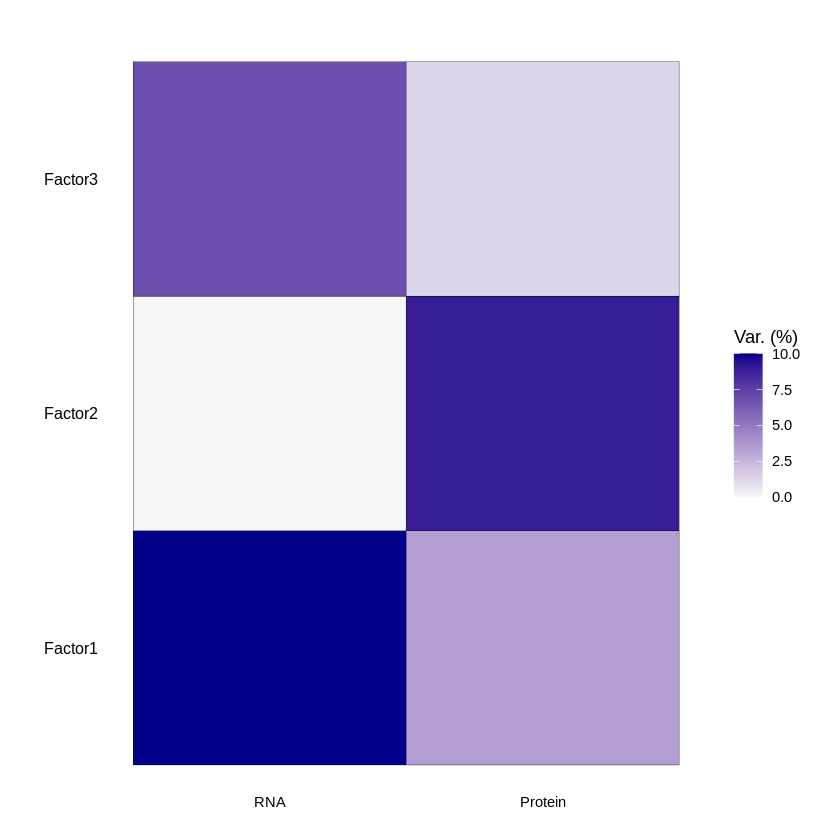

In [25]:
#Variance Decomposition by Factor
plot_variance_explained(CCLE_no_groups, max_r2=10)

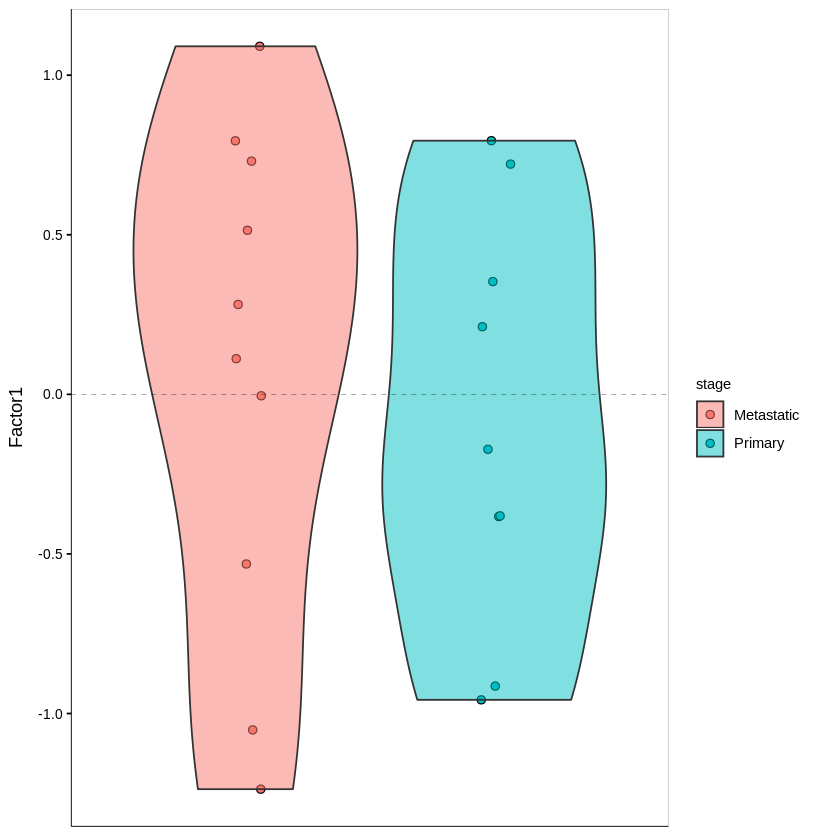

In [26]:
plot_factor(CCLE_no_groups,
  factors = 1,
  color_by = "stage",
  add_violin = TRUE,
  dodge = TRUE
)

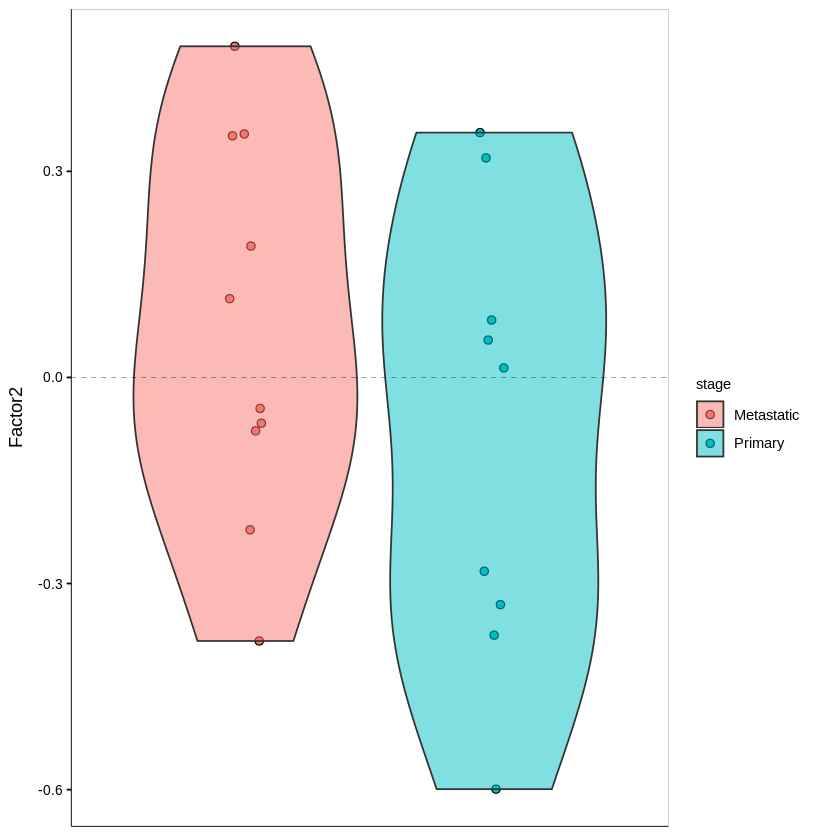

In [27]:
plot_factor(CCLE_no_groups,
  factors = 2,
  color_by = "stage",
  add_violin = TRUE,
  dodge = TRUE
)

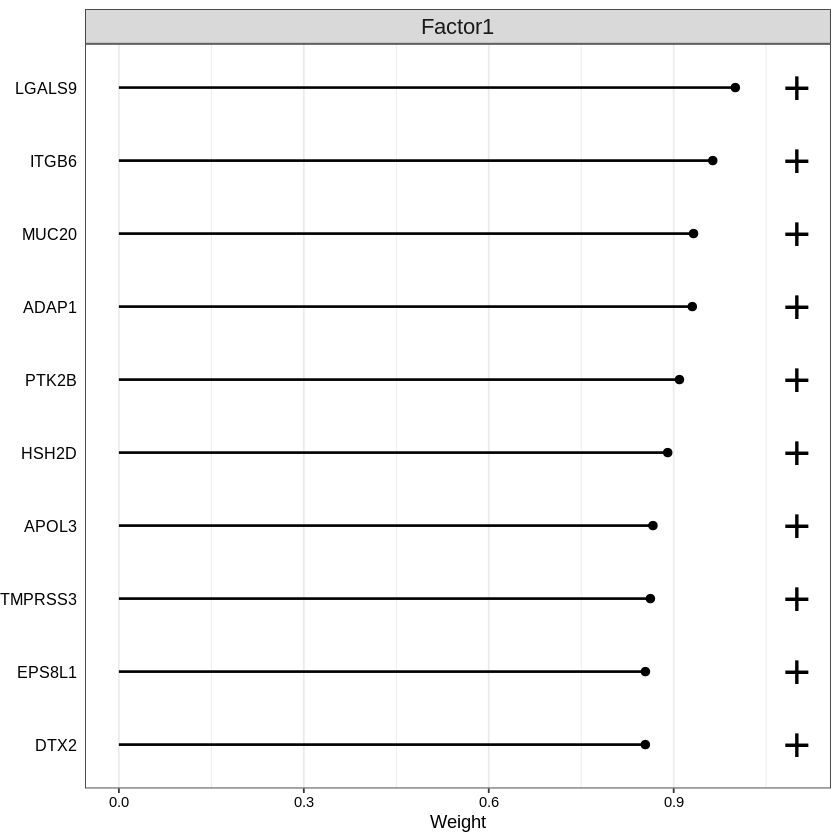

In [28]:
#Plot Feature Weights for Transcriptomic Data
plot_top_weights(CCLE_no_groups,
 view = "RNA",
 factor = 1,
 nfeatures = 10,     # Top number of features to highlight
 scale = T           # Scale weights from -1 to 1
)

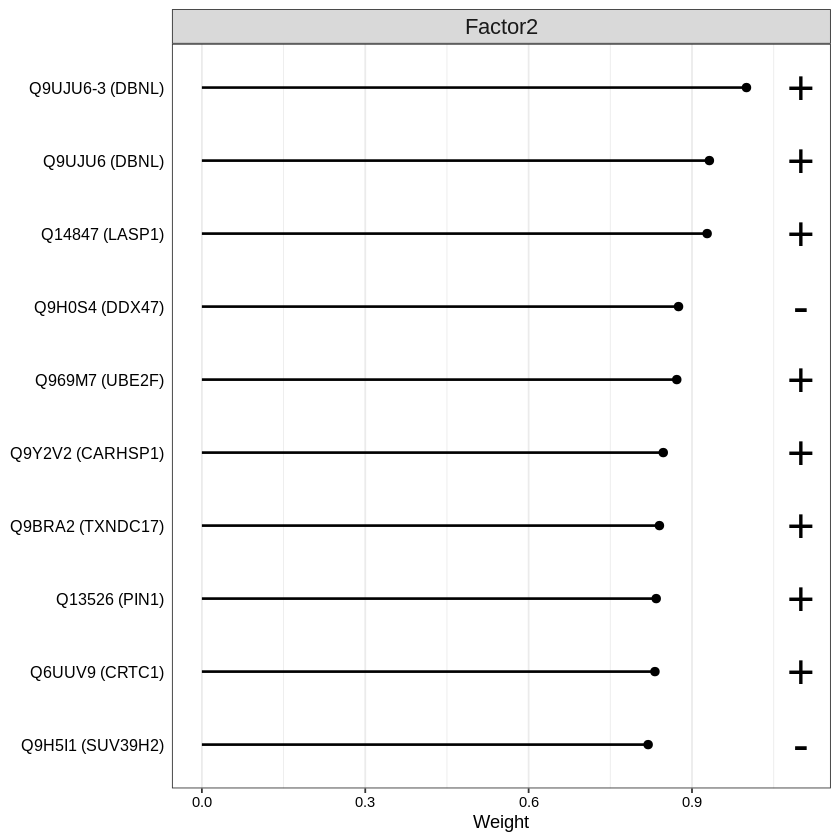

In [29]:
#Plot Feature Weights for Proteomic Data
plot_top_weights(CCLE_no_groups,
 view = "Protein",
 factor = 2,
 nfeatures = 10,     # Top number of features to highlight
 scale = T           # Scale weights from -1 to 1
)

In [ ]:
# Install
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/ggpubr")

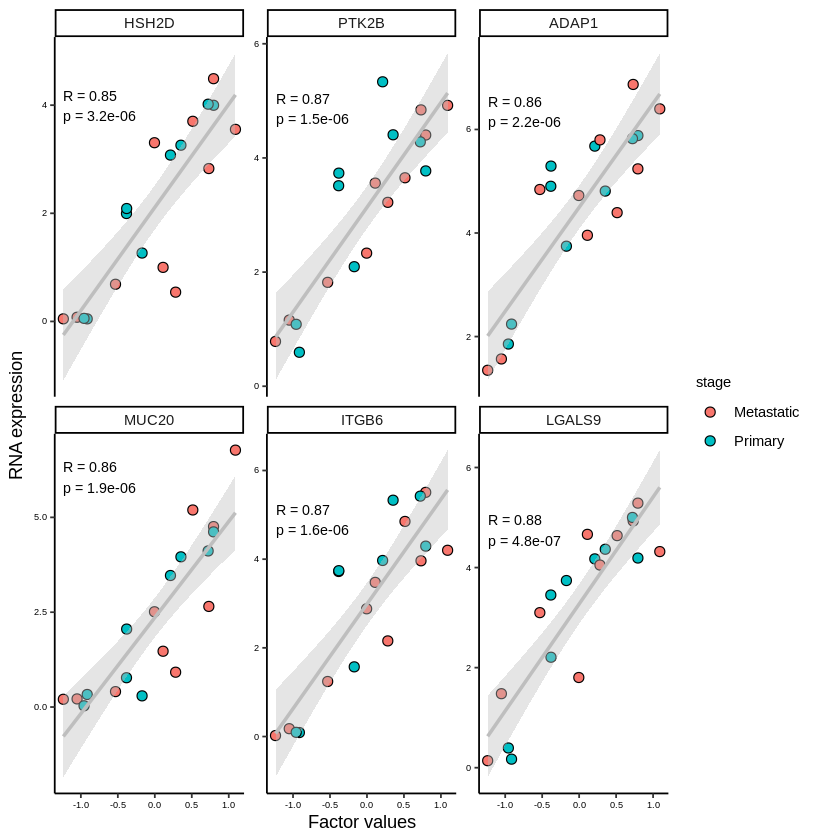

In [30]:
# Plot Factor 1 Values vs Gene Positive Expression
plot_data_scatter(CCLE_no_groups,
  view = "RNA",
  factor = 1,
  features = 6,
  sign = "positive",
  color_by = "stage"
) + labs(y="RNA expression")

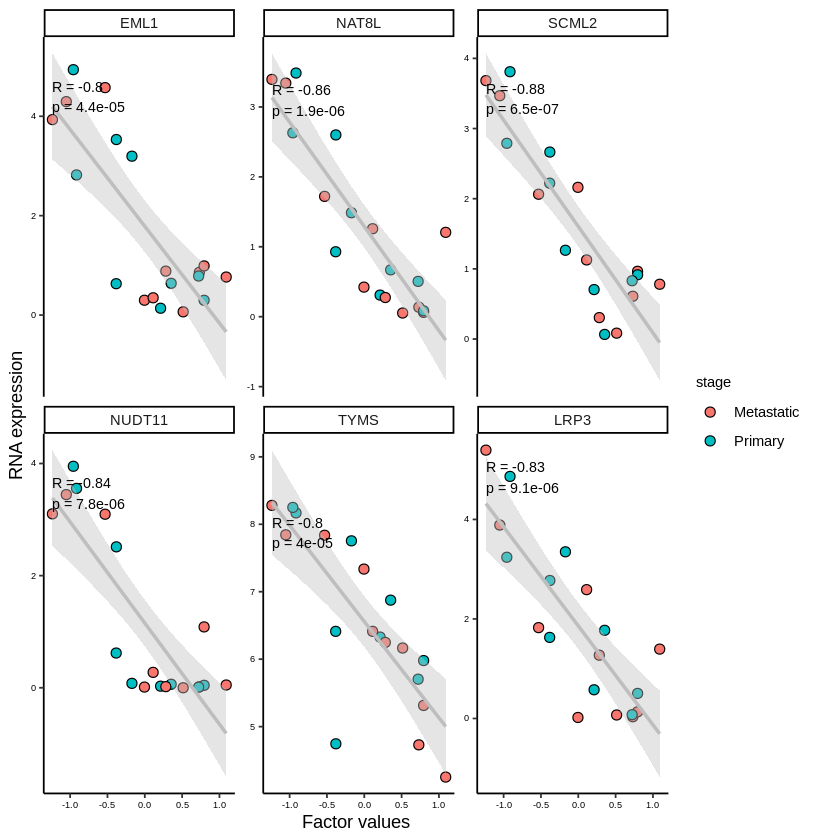

In [31]:
# Plot Factor 1 Values vs Gene Negative Expression
plot_data_scatter(CCLE_no_groups,
  view = "RNA",
  factor = 1,
  features = 6,
  sign = "negative",
  color_by = "stage"
) + labs(y="RNA expression")

In [32]:
#Create Annotation Dataframe for Heatmaps
annotation <- data.frame( age=metada_for_graph$age,
sex=metada_for_graph$sex, stage =metada_for_graph$stage
)
rownames(annotation) <- metada_for_graph$sample

'annotation_samples' provided as a data.frame, please make sure that the rownames match the sample names



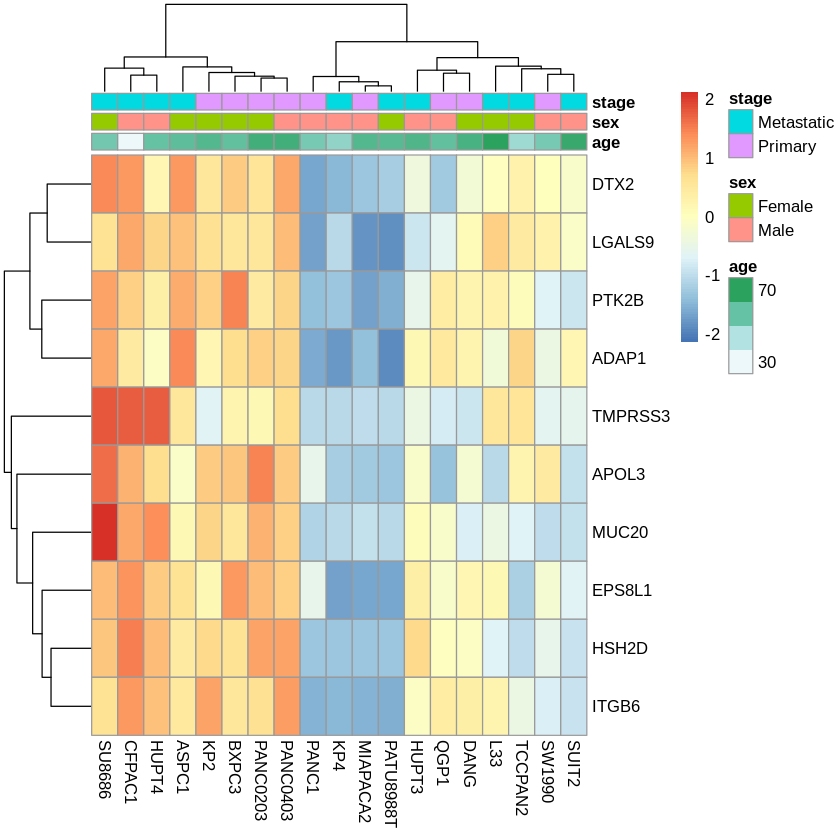

In [51]:
#Heatmap RNA View in Factor 1
plot_data_heatmap(CCLE_no_groups,
  view = "RNA",
  factor = 1,
  features = 10,
  cluster_rows = TRUE, cluster_cols = TRUE,
  show_rownames = TRUE, show_colnames = TRUE,
  scale = "row",
  annotation_samples= annotation

)

'annotation_samples' provided as a data.frame, please make sure that the rownames match the sample names



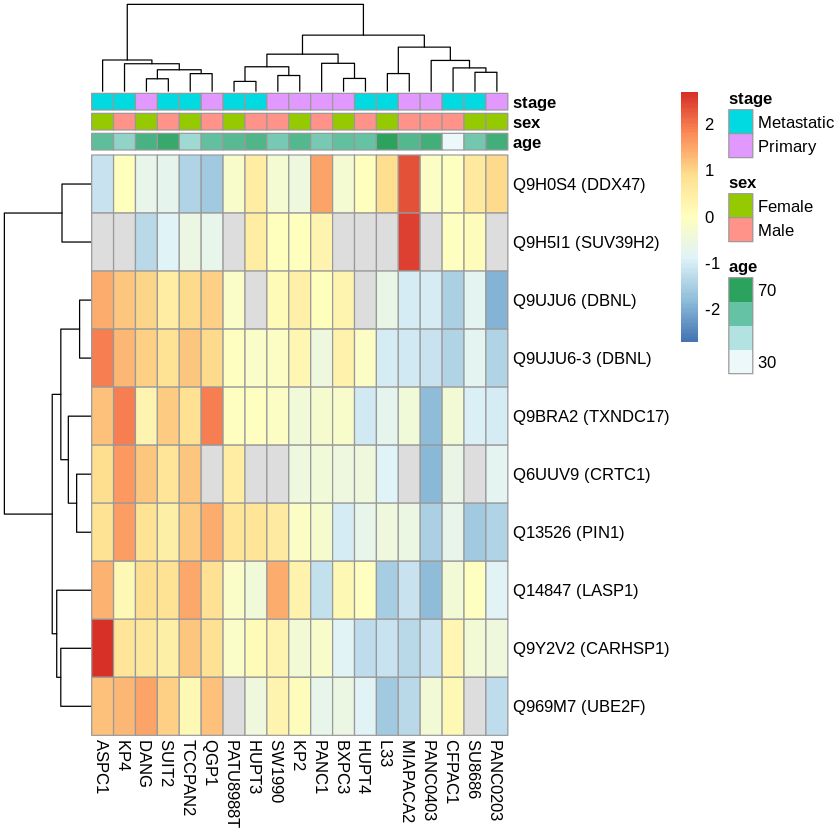

In [52]:
plot_data_heatmap(CCLE_no_groups,
  view = "Protein",
  factor = 2,
  features = 10,
  cluster_rows = TRUE, cluster_cols = TRUE,
  show_rownames = TRUE, show_colnames = TRUE,
  scale = "row",
  annotation_samples= annotation

)